In this notebook we show the capability for horsetail matching to deal with mixed uncertainties. Firs we import the modules we need...

In [1]:
from horsetailmatching import UncertainParameter, HorsetailMatching
from horsetailmatching.demoproblems import TP2

Now we specify the input uncertainties. For this test problem we'll use one interval uncertainty and one probabilistic uncertainty.

In [2]:
u1 = UncertainParameter('interval', lower_bound=-1, upper_bound=1)
u2 = UncertainParameter('uniform', lower_bound=-1, upper_bound=1)
input_uncertainties = [u1, u2]

As usual, now we can setup the horsetail matching object, using TP2 from the demo problems as our quantity of interest. Recall this is a fuction that takes two inputs: values of the design variables and uncertain parameters and returns the quantity of interest of the problem. 

In [3]:
theHM = HorsetailMatching(TP2, input_uncertainties, n_samples_prob=1000, n_samples_int=50)

Similarly, to evaluate the metric we use the evalMetric method:

In [4]:
print(theHM.evalMetric([2,3]))

11.7973075391


We can also use the plotHorsetail method to visualize the horsetail plot:

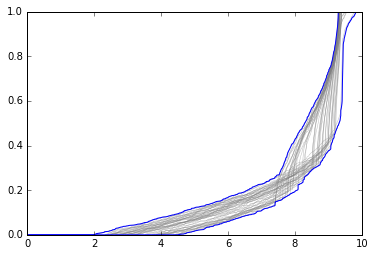

In [5]:
import matplotlib.pyplot as plt

theHM.plotHorsetail('b')
plt.show()

Since this problem is highly non-linear, we obtain a horsetail plot consisting of CDFs that cross and get an interestingly shaped horsetail plot (the envelope of the possible CDFs, plotted in blue). Now to optimize the horsetail matching metric, we simply use the evalMetric method in an optimizer as before:

In [9]:
from scipy.optimize import minimize

solution = minimize(theHM.evalMetric, x0=[1,1], method='Nelder-Mead')
print(solution)

  status: 0
    nfev: 135
 success: True
     fun: 9.7756857581825525
       x: array([ -3.55180851e-05,  -1.87945913e+01])
 message: 'Optimization terminated successfully.'
     nit: 71


In [ ]:
Now we can inspect the horsetail plot of the optimum design by using the plotHorsetail method again:

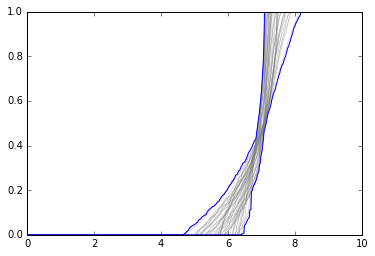

In [10]:
theHM.plotHorsetail('b')
plt.show()

We can see that while the best possible value of q over this horsetail plot is not as good as the starting point, overall we are significantly more likely to obtain a low value of q. Therefore the behaviour under uncertainty has been improved. 

You may have noticed that the optimization required a large number of evaluations to converge, and so takes some time to run. In the next notebook we will show how to utilize gradients to speed up the optimization. 